## Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [4]:
data = pd.read_csv('C:\\Users\\spars\\Desktop\\train.csv')

**A little bit of data exploration**

In [5]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Data Preprocessing

#### Handling NULL Value

In [7]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


#### Splitting data

In [9]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# <font color = "green">Linear Regression</font>

## Forward Propogation

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [10]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## Defining Cost Function

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**

where y are the actual or true values and f(x) are the predicted values.

In [11]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## Gradient Descent for Backpropagation

<u>Using Chain Rule:</u>
- cost
- f = f(x)

Partial Derivative of cost function w.r.t m 
**dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c
**dcost/dc = dcost/df * df/dc **

<u>Partial Derivatives:</u>
- dc/df = (y - f) * -1
- df/dw = x
- df/db = 1

In [12]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update the Parameters

- m = m - (learning_rate * dm)
- c = c - (learning_rate * dc)

In [13]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Train the Data

Sequence of Steps:

- Forward Propagtaion
- Cost Function
- Backward Propagation
- Update Parameters

In [14]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training

Iteration = 1, Loss = 6478.874993277116


<Figure size 432x288 with 0 Axes>

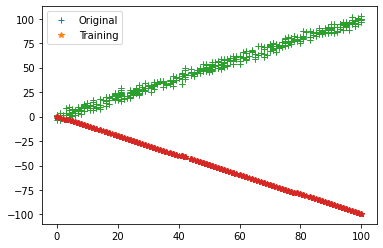

Iteration = 2, Loss = 2941.6131544541927


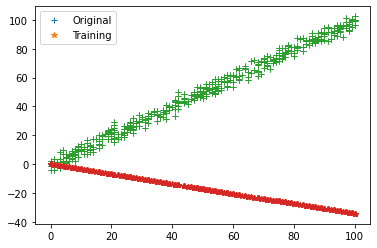

Iteration = 3, Loss = 1336.753539953267


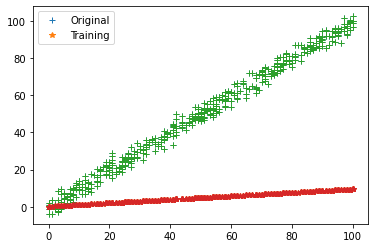

Iteration = 4, Loss = 608.6269550355879


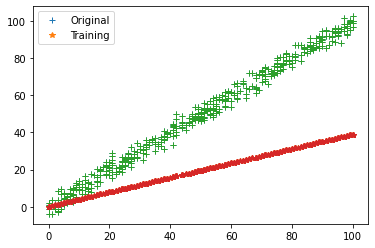

Iteration = 5, Loss = 278.2751167454757


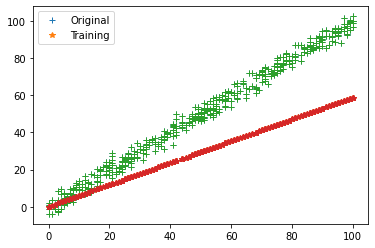

Iteration = 6, Loss = 128.39412159200475


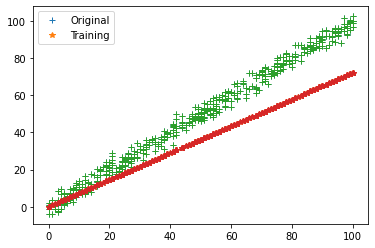

Iteration = 7, Loss = 60.39294786658209


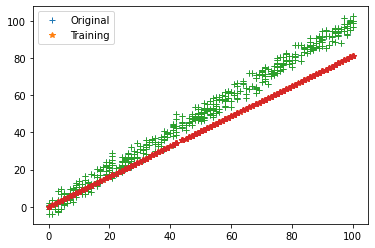

Iteration = 8, Loss = 29.54073981654048


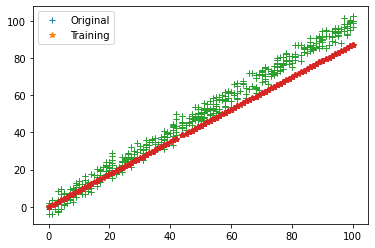

Iteration = 9, Loss = 15.5430586411552


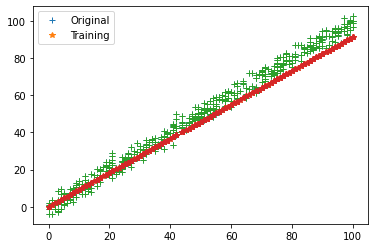

Iteration = 10, Loss = 9.192294977580724


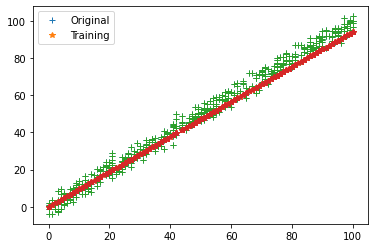

Iteration = 11, Loss = 6.310946259166362


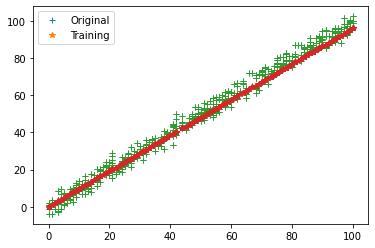

Iteration = 12, Loss = 5.003674944248705


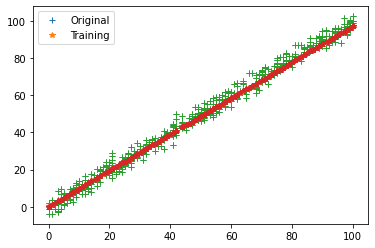

Iteration = 13, Loss = 4.410564290821076


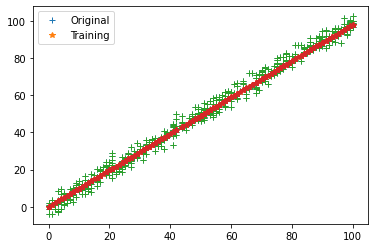

Iteration = 14, Loss = 4.141469120555827


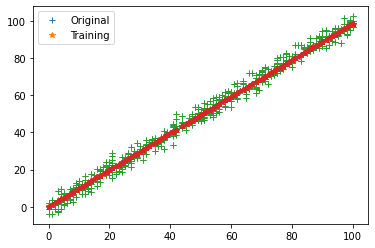

Iteration = 15, Loss = 4.019380133904825


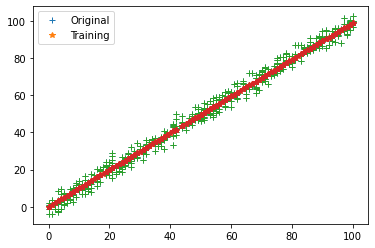

Iteration = 16, Loss = 3.9639880156002816


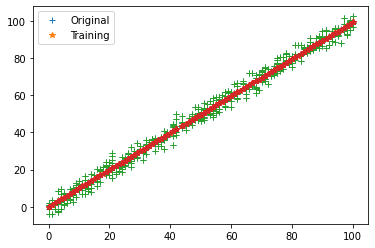

Iteration = 17, Loss = 3.9388563403512995


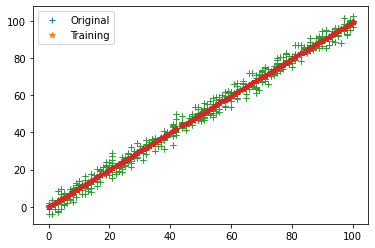

Iteration = 18, Loss = 3.927453861644909


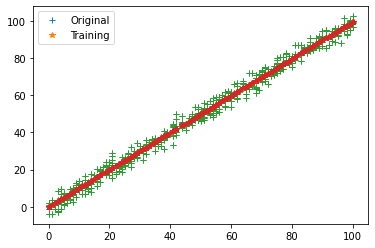

Iteration = 19, Loss = 3.922280334627484


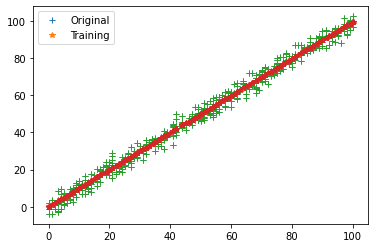

Iteration = 20, Loss = 3.9199328899013537


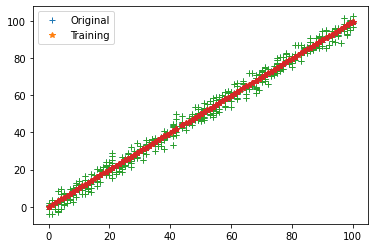

In [15]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [62]:
print(parameters)

{'m': 1.0082066011169946, 'c': -0.741647142790563}


## Let's Predict

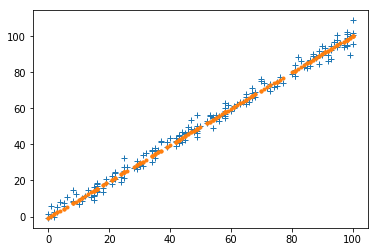

In [64]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost for test data

In [65]:
cost_function(test_predictions, test_output)

4.110833079149519

**Keep Following and Practice more :)**

**GeeksforGeeks**